## BERT score Pipeline
- Here I'm gonna set up a pipeline for evaluating the model translations against the human translations



In [1]:
#I don't know what I'm gonna need. Please sort this out later to save time

!pip install transformers
!pip install torch
!pip install pandas
!pip install scikit-learn
!pip install evaluate
!pip install nltk
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 28.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 38.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.9/796.9 kB 2.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.7 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 48.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 76.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 1.5 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 41.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 M

### Let's try the BERT score

In [ ]:

from evaluate import load
bertscore = load("bertscore")

# Check that it is working
predictions = [
    "Once upon a time, there was a king with three sons.",
    "The frog turned into a prince."
]
references = [
    "Once upon a time, there was a king who had three sons.",
    "The frog transformed into a prince."
]

results = bertscore.compute(predictions=predictions, references=references, lang="en")

print("Precision:", results["precision"])
print("Recall:", results["recall"])
print("F1 Score:", results["f1"])


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 8.1 MB/s eta 0:00:00eta 0:00:01


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: [0.9941046237945557, 0.9860562086105347]
Recall: [0.9898924231529236, 0.9860562086105347]
F1 Score: [0.9919940233230591, 0.9860562086105347]


#### nllb - jz

In [ ]:
!pip install bert_score
import os
import csv
from evaluate import load


bertscore = load("bertscore")

input_dir = "/work/Exam/nllb_renamed/"  # Change
reference_dir = "/work/Exam/reference_tales/jz/"  # Change
output_csv_bertscore = "/work/Exam/Scores/bert_nllb_jz.csv"  # Change

headers = [
    "File", "Precision", "Recall", "F1 Score", 
    "Translation Length", "Reference Length"
]
with open(output_csv_bertscore, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(headers)

def extract_number(filename):
    return filename.split('_')[0]

# Compute BERTScore
for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        file_number = extract_number(filename)
        
        reference_file = None
        for ref_filename in os.listdir(reference_dir):
            if ref_filename.startswith(file_number):
                reference_file = os.path.join(reference_dir, ref_filename)
                break
        
        if not reference_file:
            print(f"No matching reference file found for {filename}. Skipping...")
            continue

        translated_file = os.path.join(input_dir, filename)
        with open(translated_file, "r", encoding="utf-8") as file:
            translated_text = file.read().strip()
        with open(reference_file, "r", encoding="utf-8") as file:
            reference_text = file.read().strip()

        results = bertscore.compute(predictions=[translated_text], references=[[reference_text]], lang="en")
        
        precision = results["precision"]
        recall = results["recall"]
        f1_score = results["f1"]
        translation_length = len(translated_text.split())  # Counting words for translation length
        reference_length = len(reference_text.split())  # Counting words for reference length

        # CSV
        with open(output_csv_bertscore, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow([
                filename, precision, recall, f1_score, 
                translation_length, reference_length
            ])

        print(f"BERTScore for {filename} saved.")

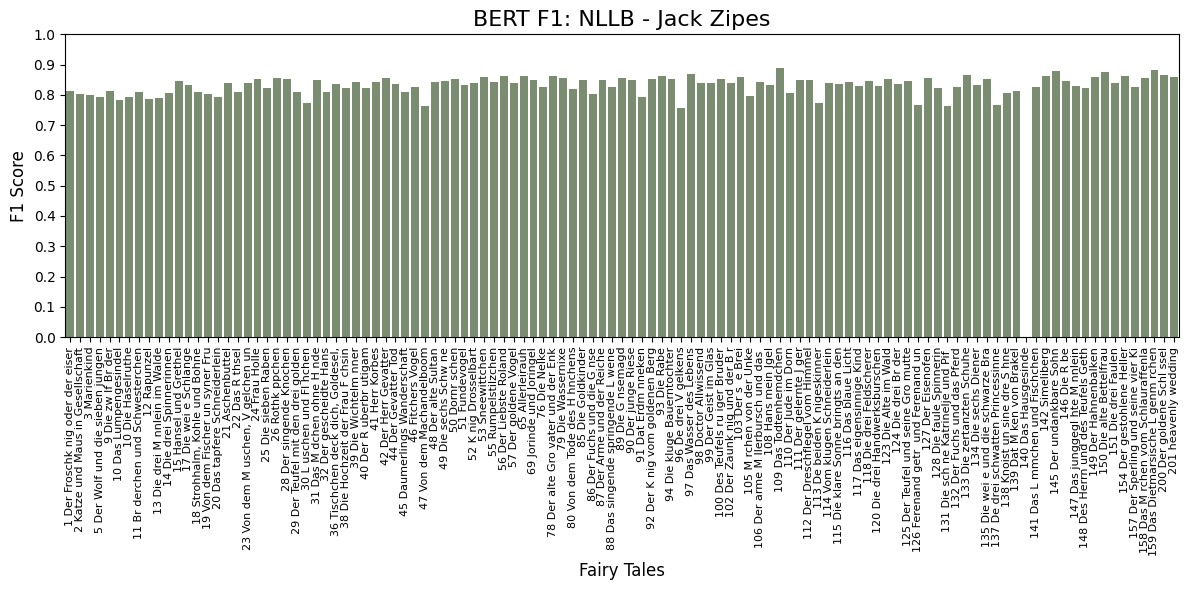

In [27]:
#plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


file_path = "/work /Exam/Scores/bert_nllb_jz.csv"  # Change
data = pd.read_csv(file_path)

data['F1 Score'] = data['F1 Score'].apply(lambda x: eval(x)[0])

data['File'] = data['File'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')
data['Numeric Prefix'] = data['File'].str.extract(r'^(\d+)').astype(int)

#from lowest to highest 
data = data.sort_values(by='Numeric Prefix')

plt.figure(figsize=(12, 6))
sns.barplot(x='File', y='F1 Score', data=data, color='#79926C') #vertical --> better reading
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.title('BERT F1: NLLB - Jack Zipes', fontsize=16)
plt.xlabel('Fairy Tales', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1)

# Use MaxNLocator to set y-axis ticks at intervals of 0.1, otherwise not visible???
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=11))

plt.tight_layout()

plt.show()

#### NLLB - MH

In [3]:
!pip install bert_score
import os
import csv
from evaluate import load


bertscore = load("bertscore")

input_dir = "/work/Exam/nllb_renamed/"  # Change
reference_dir = "/work/Exam/reference_tales/mh/"  # Change
output_csv_bertscore = "/work/Exam/Scores/bert_nllb_mh.csv"  # Change

headers = [
    "File", "Precision", "Recall", "F1 Score", 
    "Translation Length", "Reference Length"
]
with open(output_csv_bertscore, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(headers)

def extract_number(filename):
    return filename.split('_')[0]

# Compute BERTScore
for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        file_number = extract_number(filename)
        
        reference_file = None
        for ref_filename in os.listdir(reference_dir):
            if ref_filename.startswith(file_number):
                reference_file = os.path.join(reference_dir, ref_filename)
                break
        
        if not reference_file:
            print(f"No matching reference file found for {filename}. Skipping...")
            continue

        translated_file = os.path.join(input_dir, filename)
        with open(translated_file, "r", encoding="utf-8") as file:
            translated_text = file.read().strip()
        with open(reference_file, "r", encoding="utf-8") as file:
            reference_text = file.read().strip()

        results = bertscore.compute(predictions=[translated_text], references=[[reference_text]], lang="en")
        
        precision = results["precision"]
        recall = results["recall"]
        f1_score = results["f1"]
        translation_length = len(translated_text.split())  # Counting words for translation length
        reference_length = len(reference_text.split())  # Counting words for reference length

        # CSV
        with open(output_csv_bertscore, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow([
                filename, precision, recall, f1_score, 
                translation_length, reference_length
            ])

        print(f"BERTScore for {filename} saved.")

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 28.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 7.9 MB/s eta 0:00:00eta 0:00:01


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore for 21_cinderella.txt saved.
BERTScore for 134_the_six_servants.txt saved.
No matching reference file found for 201_heavenly_wedding.txt. Skipping...
BERTScore for 200_the_golden_key.txt saved.
BERTScore for 41_herr_korbes.txt saved.
BERTScore for 17_the_white_snake.txt saved.
BERTScore for 111_The_Skilful_Huntsman.txt saved.
BERTScore for 86_the_fox_and_the_geese.txt saved.
BERTScore for 15_hansel_and_grethel.txt saved.
BERTScore for 135_the_white_bride_and_the_black_.txt saved.
BERTScore for 131_Fair_Katrinelje_and_Pif-Paf-Po.txt saved.
BERTScore for 94_The_Peasant’s_Wise_Daughter.txt saved.
BERTScore for 98_doctor_knowall.txt saved.
BERTScore for 123_the_old_woman_in_the_wood.txt saved.
BERTScore for 138_knoist_and_his_three_sons.txt saved.
BERTScore for 157_the_sparrow_and_his_four_child.txt saved.
BERTScore for 65_Allerleirauh.txt saved.
BERTScore for 36_The_Wishing-Table,_the_Gold-As.txt saved.
BERTScore for 146_the_turnip.txt saved.
BERTScore for 23_The_Mouse,_the_Bird

BERTScore for 140_domestic_servants.txt saved.
BERTScore for 116_the_blue_light.txt saved.
BERTScore for 97_the_water_of_life.txt saved.
BERTScore for 9_the_twelve_brothers.txt saved.
BERTScore for 1_the_frog-king,_or_iron_henry.txt saved.
BERTScore for 50_briar-rose.txt saved.
BERTScore for 52_king_thrushbeard.txt saved.
BERTScore for 148_The_Lord’s_Animals_and_the_Dev.txt saved.
BERTScore for 85_the_gold-children.txt saved.
BERTScore for 78_The_Old_Man_and_His_Grandson.txt saved.
BERTScore for 76_The_Pink.txt saved.
BERTScore for 142_simeli_mountain.txt saved.
BERTScore for 53_little_snow-white.txt saved.
BERTScore for 79_the_water-nix.txt saved.
BERTScore for 137_the_three_black_princesses.txt saved.
BERTScore for 45_Thumbling_as_Journeyman.txt saved.
BERTScore for 114_The_Cunning_Little_Tailor.txt saved.
BERTScore for 12_rapunzel.txt saved.
BERTScore for 106_The_Poor_Miller’s_Boy_and_the_.txt saved.
BERTScore for 139_the_maid_of_brakel.txt saved.
BERTScore for 118_the_three_army-su

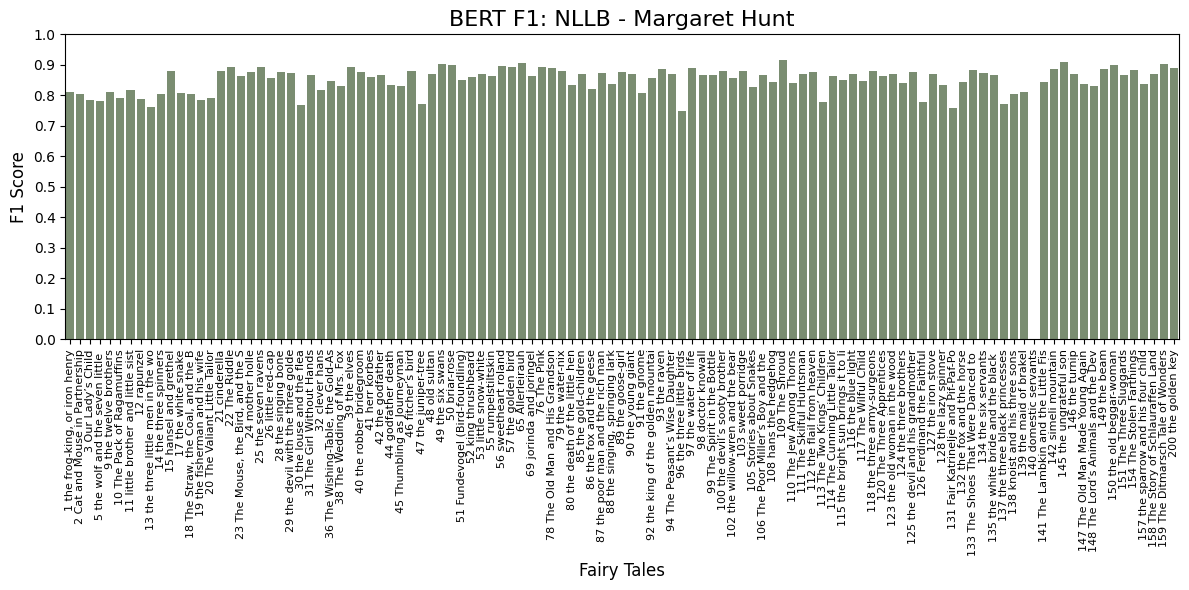

In [26]:
#plotting nllb mh
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


file_path = "/work /Exam/Scores/bert_nllb_mh.csv"  # Change
data = pd.read_csv(file_path)

data['F1 Score'] = data['F1 Score'].apply(lambda x: eval(x)[0])

data['File'] = data['File'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')
data['Numeric Prefix'] = data['File'].str.extract(r'^(\d+)').astype(int)

#from lowest to highest 
data = data.sort_values(by='Numeric Prefix')

plt.figure(figsize=(12, 6))
sns.barplot(x='File', y='F1 Score', data=data, color='#79926C') #vertical --> better reading
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.title('BERT F1: NLLB - Margaret Hunt', fontsize=16)
plt.xlabel('Fairy Tales', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1)

# Use MaxNLocator to set y-axis ticks at intervals of 0.1, otherwise not visible???
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=11))

plt.tight_layout()

plt.show()

#### LLAMA - JZ

In [3]:
#llama jz
!pip install bert_score
import os
import csv
from evaluate import load

bertscore = load("bertscore")

input_dir = "/work/Exam/llama__score"  # Change
reference_dir = "/work /Exam/reference_tales/jz/"  # Change
output_csv_bertscore = "/work /Exam/Scores/bert_llama_jz.csv"  # Change

headers = [
    "File", "Precision", "Recall", "F1 Score", 
    "Translation Length", "Reference Length"
]
with open(output_csv_bertscore, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(headers)

def extract_number(filename):
    return filename.split('_')[0]

for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        file_number = extract_number(filename)
        
        reference_file = None
        for ref_filename in os.listdir(reference_dir):
            if ref_filename.startswith(file_number):
                reference_file = os.path.join(reference_dir, ref_filename)
                break
        
        if not reference_file:
            print(f"No matching reference file found for {filename}. Skipping...")
            continue
        translated_file = os.path.join(input_dir, filename)
        with open(translated_file, "r", encoding="utf-8") as file:
            translated_text = file.read().strip()
        with open(reference_file, "r", encoding="utf-8") as file:
            reference_text = file.read().strip()

        results = bertscore.compute(predictions=[translated_text], references=[[reference_text]], lang="en")
        
        precision = results["precision"]
        recall = results["recall"]
        f1_score = results["f1"]
        translation_length = len(translated_text.split())  # Counting words for translation length
        reference_length = len(reference_text.split())  # Counting words for reference length

        # CSV
        with open(output_csv_bertscore, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow([
                filename, precision, recall, f1_score, 
                translation_length, reference_length
            ])

        print(f"BERTScore for {filename} saved.")

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 23.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 33.2 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore for 157_Der_Sperling_und_seine_vier_Ki_en(1).txt saved.
BERTScore for 2_Katze_und_Maus_in_Gesellschaft_en(1).txt saved.
BERTScore for 55_Rumpelstilzchen_en(1).txt saved.
BERTScore for 105_Märchen_von_der_Unke_en.txt saved.
BERTScore for 42_Der_Herr_Gevatter_en(1).txt saved.
BERTScore for 86_Der_Fuchs_und_die_G_nse_en.txt saved.
BERTScore for 23_Von_dem_M_uschen,_V_gelchen_un_en(1).txt saved.
BERTScore for 76_Die_Nelke_en.txt saved.
BERTScore for 94_Die_kluge_Bauerntochter_en.txt saved.
BERTScore for 80_Von_dem_Tode_des_H_hnchens_en(1).txt saved.
BERTScore for 26_Rothk_ppchen_en(1).txt saved.
BERTScore for 118_Die_drei_Feldscherer_en(1).txt saved.
BERTScore for 138_Knoist_un_sine_dre_S_hne_en(1).txt saved.
BERTScore for 120_Die_drei_Handwerksburschen_en.txt saved.
BERTScore for 146_Die_R_be_en(1).txt saved.
BERTScore for 41_Herr_Korbes_en(1).txt saved.
BERTScore for 135_Die_wei_e_und_die_schwarze_Bra_en(1).txt saved.
BERTScore for 53_Sneewittchen_en(1).txt saved.
BERTScore for

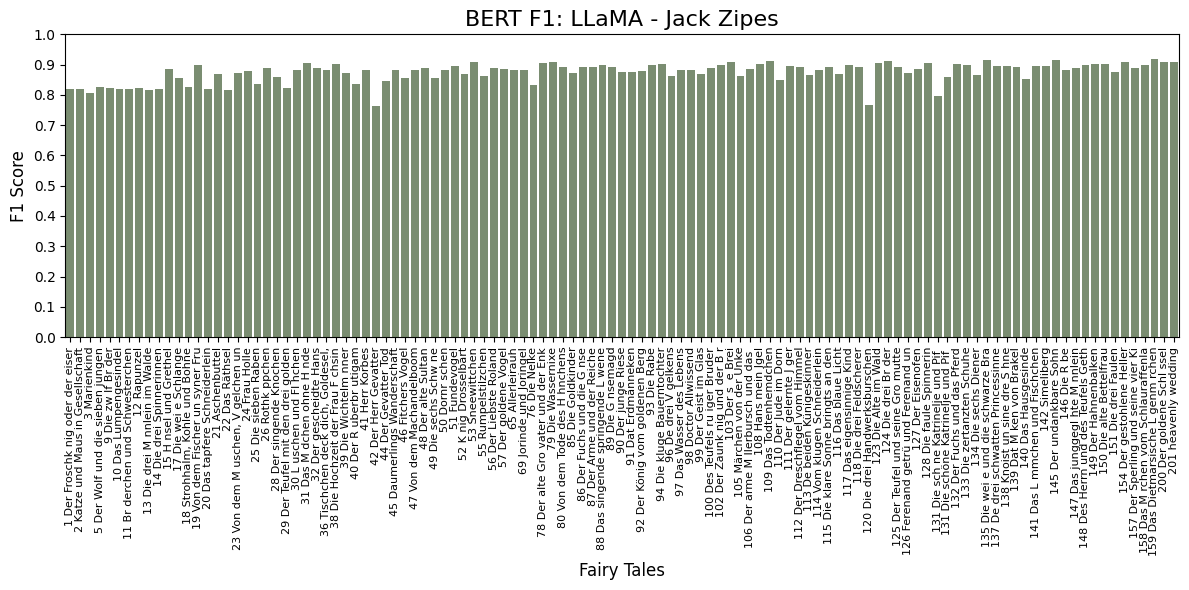

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


file_path = "/work/Exam/Scores/bert_llama_jz.csv"  # remem to change for every plot
data = pd.read_csv(file_path)

data['F1 Score'] = data['F1 Score'].apply(lambda x: eval(x)[0])

data['File'] = data['File'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')
data['Numeric Prefix'] = data['File'].str.extract(r'^(\d+)').astype(int)

#from lowest to highest. no chaos thank you very much
data = data.sort_values(by='Numeric Prefix')

plt.figure(figsize=(12, 6))
sns.barplot(x='File', y='F1 Score', align='edge', data=data, color='#79926C') #vertical --> better reading
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.title('BERT F1: LLaMA - Jack Zipes', fontsize=16)
plt.xlabel('Fairy Tales', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1)

# Use MaxNLocator to set y-axis ticks at intervals of 0.1, otherwise not visible???
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=11))

plt.tight_layout()

plt.show()

#### LLAMA - MH

In [9]:
#llama
#!pip install bert_score
import os
import csv
from evaluate import load

bertscore = load("bertscore")

input_dir = "/work /Exam/llama__score"  # Change
reference_dir = "/work /Exam/reference_tales/mh/"  # Change
output_csv_bertscore = "/work /Exam/Scores/bert_llama_mh.csv"  # Change

headers = [
    "File", "Precision", "Recall", "F1 Score", 
    "Translation Length", "Reference Length"
]
with open(output_csv_bertscore, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(headers)

def extract_number(filename):
    return filename.split('_')[0]

for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        file_number = extract_number(filename)
        
        reference_file = None
        for ref_filename in os.listdir(reference_dir):
            if ref_filename.startswith(file_number):
                reference_file = os.path.join(reference_dir, ref_filename)
                break
        
        if not reference_file:
            print(f"No matching reference file found for {filename}. Skipping...")
            continue
        translated_file = os.path.join(input_dir, filename)
        with open(translated_file, "r", encoding="utf-8") as file:
            translated_text = file.read().strip()
        with open(reference_file, "r", encoding="utf-8") as file:
            reference_text = file.read().strip()

        results = bertscore.compute(predictions=[translated_text], references=[[reference_text]], lang="en")
        
        precision = results["precision"]
        recall = results["recall"]
        f1_score = results["f1"]
        translation_length = len(translated_text.split())  # Counting words for translation length
        reference_length = len(reference_text.split())  # Counting words for reference length

        # Write to CSV
        with open(output_csv_bertscore, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow([
                filename, precision, recall, f1_score, 
                translation_length, reference_length
            ])

        print(f"BERTScore for {filename} saved.")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore for 157_Der_Sperling_und_seine_vier_Ki_en(1).txt saved.
BERTScore for 2_Katze_und_Maus_in_Gesellschaft_en(1).txt saved.
BERTScore for 55_Rumpelstilzchen_en(1).txt saved.
BERTScore for 105_Märchen_von_der_Unke_en.txt saved.
BERTScore for 42_Der_Herr_Gevatter_en(1).txt saved.
BERTScore for 86_Der_Fuchs_und_die_G_nse_en.txt saved.
BERTScore for 23_Von_dem_M_uschen,_V_gelchen_un_en(1).txt saved.
BERTScore for 76_Die_Nelke_en.txt saved.
BERTScore for 94_Die_kluge_Bauerntochter_en.txt saved.
BERTScore for 80_Von_dem_Tode_des_H_hnchens_en(1).txt saved.
BERTScore for 26_Rothk_ppchen_en(1).txt saved.
BERTScore for 118_Die_drei_Feldscherer_en(1).txt saved.
BERTScore for 138_Knoist_un_sine_dre_S_hne_en(1).txt saved.
BERTScore for 120_Die_drei_Handwerksburschen_en.txt saved.
BERTScore for 146_Die_R_be_en(1).txt saved.
BERTScore for 41_Herr_Korbes_en(1).txt saved.
BERTScore for 135_Die_wei_e_und_die_schwarze_Bra_en(1).txt saved.
BERTScore for 53_Sneewittchen_en(1).txt saved.
BERTScore for

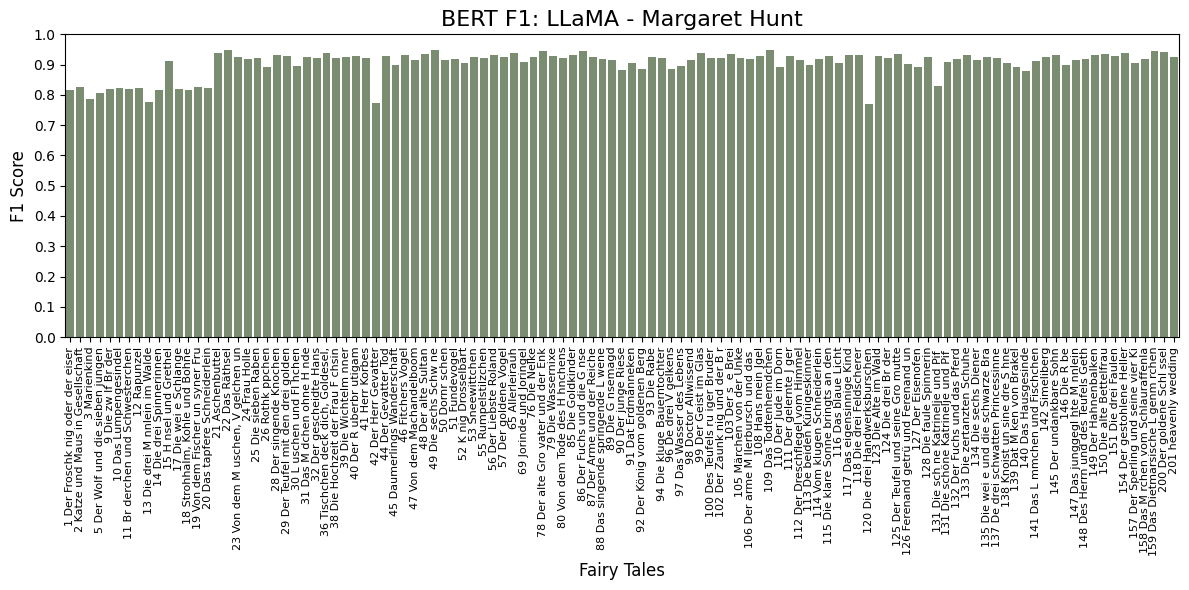

In [25]:
#plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


file_path = "/work /Exam/Scores/bert_llama_mh.csv"  # Change
data = pd.read_csv(file_path)

data['F1 Score'] = data['F1 Score'].apply(lambda x: eval(x)[0])

data['File'] = data['File'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')
data['Numeric Prefix'] = data['File'].str.extract(r'^(\d+)').astype(int)

#from lowest to highest 
data = data.sort_values(by='Numeric Prefix')

plt.figure(figsize=(12, 6))
sns.barplot(x='File', y='F1 Score', data=data, color='#79926C')  #Moss green <3
#vertical --> better reading
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.title('BERT F1: LLaMA - Margaret Hunt', fontsize=16)
plt.xlabel('Fairy Tales', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1)

# Use MaxNLocator to set y-axis ticks at intervals of 0.1, otherwise not visible???
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=11))

plt.tight_layout()

plt.show()

#### Let's look at some facts
- Mean for all scores and references

In [13]:
#mean for nllb jz
import pandas as pd

file_path = "/work /Exam/Scores/bert_nllb_jz.csv"  # Change
nllb_jz = pd.read_csv(file_path)

nllb_jz['F1 Score'] = nllb_jz['F1 Score'].apply(lambda x: eval(x)[0])  # Convert to float
nllb_jz['Precision'] = nllb_jz['Precision'].apply(lambda x: eval(x)[0])
nllb_jz['Recall'] = nllb_jz['Recall'].apply(lambda x: eval(x)[0])

mean_f1 = nllb_jz['F1 Score'].mean()
mean_precision = nllb_jz['Precision'].mean()
mean_recall = nllb_jz['Recall'].mean()

print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")


Mean F1 Score: 0.8243
Mean Precision: 0.8199
Mean Recall: 0.8290


In [ ]:
#mean for nllb mh
import pandas as pd

file_path = "/work /Exam/Scores/bert_nllb_mh.csv"  # Change
nllb_mh = pd.read_csv(file_path)

nllb_mh['F1 Score'] = nllb_mh['F1 Score'].apply(lambda x: eval(x)[0])  # Convert to float
nllb_mh['Precision'] = nllb_mh['Precision'].apply(lambda x: eval(x)[0])
nllb_mh['Recall'] = nllb_mh['Recall'].apply(lambda x: eval(x)[0])

mean_f1 = nllb_mh['F1 Score'].mean()
mean_precision = nllb_mh['Precision'].mean()
mean_recall = nllb_mh['Recall'].mean()

print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")


Mean F1 Score: 0.8433
Mean Precision: 0.8362
Mean Recall: 0.8507


In [14]:
#mean for llama jz
import pandas as pd

file_path = "/work /Exam/Scores/bert_llama_jz.csv"  # Change
llama_jz = pd.read_csv(file_path)

llama_jz['F1 Score'] = llama_jz['F1 Score'].apply(lambda x: eval(x)[0])  # Convert to float
llama_jz['Precision'] = llama_jz['Precision'].apply(lambda x: eval(x)[0])
llama_jz['Recall'] = llama_jz['Recall'].apply(lambda x: eval(x)[0])

mean_f1 = llama_jz['F1 Score'].mean()
mean_precision = llama_jz['Precision'].mean()
mean_recall = llama_jz['Recall'].mean()

print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")

Mean F1 Score: 0.8743
Mean Precision: 0.8780
Mean Recall: 0.8707


In [15]:
#mean for llama mh
import pandas as pd

file_path = "/work /Exam/Scores/bert_llama_mh.csv"  # Change
llama_mh = pd.read_csv(file_path)

llama_mh['F1 Score'] = llama_mh['F1 Score'].apply(lambda x: eval(x)[0])  # Convert to float
llama_mh['Precision'] = llama_mh['Precision'].apply(lambda x: eval(x)[0])
llama_mh['Recall'] = llama_mh['Recall'].apply(lambda x: eval(x)[0])

mean_f1 = llama_mh['F1 Score'].mean()
mean_precision = llama_mh['Precision'].mean()
mean_recall = llama_mh['Recall'].mean()

print(f"Mean F1 Score: {mean_f1:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")

Mean F1 Score: 0.9039
Mean Precision: 0.9055
Mean Recall: 0.9024


### Building combined plots for the mean

In [5]:
import pandas as pd

file_path_ref1 = "/work /Exam/Scores/bert_nllb_jz.csv"  # Jack Zipes
file_path_ref2 = "/work /Exam/Scores/bert_nllb_mh.csv"  # Margaret Hunt

data_ref1 = pd.read_csv(file_path_ref1)
data_ref2 = pd.read_csv(file_path_ref2)

data_ref1['Numeric Prefix'] = data_ref1['File'].str.extract(r'^(\d+)').astype(int)
data_ref2['Numeric Prefix'] = data_ref2['File'].str.extract(r'^(\d+)').astype(int)

data_ref1['F1 Score'] = data_ref1['F1 Score'].apply(lambda x: eval(x)[0])
data_ref2['F1 Score'] = data_ref2['F1 Score'].apply(lambda x: eval(x)[0])

merged_data = pd.merge(data_ref1, data_ref2, on='Numeric Prefix', suffixes=('_Ref1', '_Ref2'))
merged_data['Mean F1 Score'] = merged_data[['F1 Score_Ref1', 'F1 Score_Ref2']].mean(axis=1)

merged_data['File'] = merged_data['File_Ref1'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')

# Sort by numeric prefix
merged_data_nllb = merged_data.sort_values(by='Numeric Prefix')

#look at dataframe
print(merged_data_nllb[['File', 'F1 Score_Ref1', 'F1 Score_Ref2', 'Mean F1 Score']])



                                  File  F1 Score_Ref1  F1 Score_Ref2  \
57    1 Der Froschk nig oder der eiser       0.811975       0.810295   
23    2 Katze und Maus in Gesellschaft       0.803414       0.804274   
90                        3 Marienkind       0.800241       0.784707   
74    5 Der Wolf und die sieben jungen       0.793434       0.782200   
77                  9 Die zw lf Br der       0.813590       0.811135   
..                                 ...            ...            ...   
38           154 Der gestohlene Heller       0.862205       0.883229   
55  157 Der Sperling und seine vier Ki       0.825401       0.837019   
20  158 Das M rchen vom Schlauraffenla       0.854864       0.869538   
21  159 Das Dietmarsische L genm rchen       0.881525       0.901588   
0            200 Der goldene Schl ssel       0.867183       0.889982   

    Mean F1 Score  
57       0.811135  
23       0.803844  
90       0.792474  
74       0.787817  
77       0.812362  
..            .

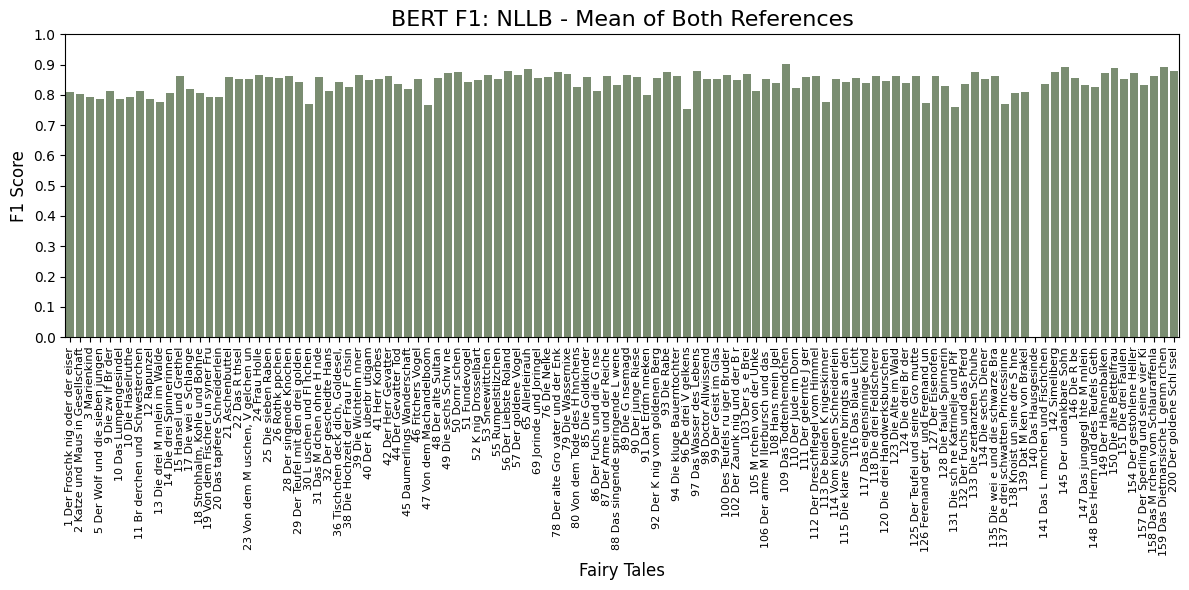

In [10]:
#plotting nllb mh
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

data = merged_data_nllb.copy()  # Make a copy to ensure no accidental changes
data['File'] = data['File'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')

data = data.sort_values(by='Numeric Prefix')

plt.figure(figsize=(12, 6))
sns.barplot(x='File', y='Mean F1 Score', data=data, color='#79926C')

plt.xticks(rotation=90, ha='center', fontsize=8)
plt.title('BERT F1: NLLB - Mean of Both References', fontsize=16)
plt.xlabel('Fairy Tales', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1)

# Set y-axis ticks at intervals of 0.1
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=11))


plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

file_path_ref1 = "/work /Exam/Scores/bert_llama_jz.csv"  # Jack Zipes
file_path_ref2 = "/work /Exam/Scores/bert_llama_mh.csv"  # Margaret Hunt

data_ref1 = pd.read_csv(file_path_ref1)
data_ref2 = pd.read_csv(file_path_ref2)

data_ref1['Numeric Prefix'] = data_ref1['File'].str.extract(r'^(\d+)').astype(int)
data_ref2['Numeric Prefix'] = data_ref2['File'].str.extract(r'^(\d+)').astype(int)

data_ref1['F1 Score'] = data_ref1['F1 Score'].apply(lambda x: eval(x)[0])
data_ref2['F1 Score'] = data_ref2['F1 Score'].apply(lambda x: eval(x)[0])

merged_data = pd.merge(data_ref1, data_ref2, on='Numeric Prefix', suffixes=('_Ref1', '_Ref2'))
merged_data['Mean F1 Score'] = merged_data[['F1 Score_Ref1', 'F1 Score_Ref2']].mean(axis=1)

merged_data['File'] = merged_data['File_Ref1'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')

# Sort by numeric prefix
merged_data_llama = merged_data.sort_values(by='Numeric Prefix')

#look at dataframe
print(merged_data_llama[['File', 'F1 Score_Ref1', 'F1 Score_Ref2', 'Mean F1 Score']])

                                  File  F1 Score_Ref1  F1 Score_Ref2  \
40    1 Der Froschk nig oder der eiser       0.818824       0.816316   
1     2 Katze und Maus in Gesellschaft       0.819816       0.826956   
90                        3 Marienkind       0.807084       0.786126   
98    5 Der Wolf und die sieben jungen       0.826493       0.807588   
85                  9 Die zw lf Br der       0.824326       0.821031   
..                                 ...            ...            ...   
0   157 Der Sperling und seine vier Ki       0.888019       0.903797   
46  158 Das M rchen vom Schlauraffenla       0.900057       0.919290   
20  159 Das Dietmarsische L genm rchen       0.919419       0.944737   
71           200 Der goldene Schl ssel       0.907401       0.943208   
51                201 heavenly wedding       0.907378       0.924981   

    Mean F1 Score  
40       0.817570  
1        0.823386  
90       0.796605  
98       0.817041  
85       0.822678  
..            .

In [4]:

data = merged_data_llama.drop_duplicates(subset='File') #theres an imposter among the data



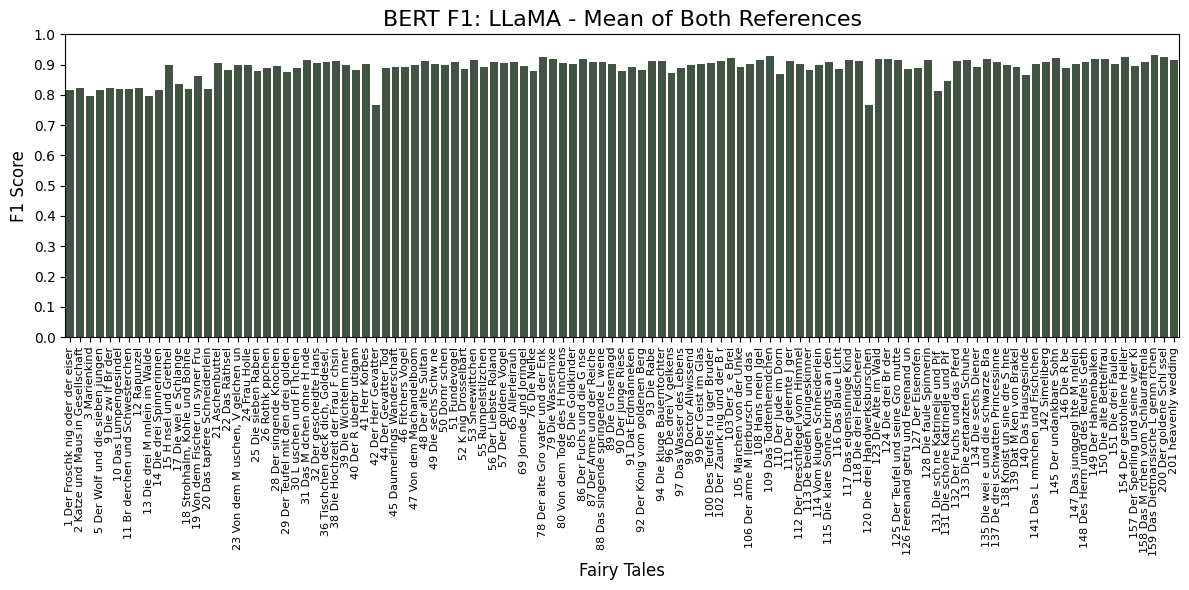

In [6]:
#plotting nllb mh
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

data = data.copy()  # Make a copy to ensure no accidental changes

data['File'] = data['File'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')

data = data.sort_values(by='Numeric Prefix')

plt.figure(figsize=(12, 6))
sns.barplot(x='File', y='Mean F1 Score', data=data, color='#3E563E')

plt.xticks(rotation=90, ha='center', fontsize=8)
plt.title('BERT F1: LLaMA - Mean of Both References', fontsize=16)
plt.xlabel('Fairy Tales', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1)

# Set y-axis ticks at intervals of 0.1
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=11))


plt.tight_layout()
plt.show()